In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt



In [3]:
data = pd.read_csv('../dane/dane_wyczyszczone.csv')
data

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,0.50,if,d,ideal,5.10,5.15,3.20,61.50,57.0,3000.0
1,0.70,vvs2,e,premium,5.70,5.58,3.52,62.00,59.0,4500.0
2,0.47,si2,h,good,4.30,4.31,2.79,62.30,56.0,700.0
3,1.20,if,d,ideal,6.32,6.82,4.20,61.70,58.0,10000.0
4,0.72,si1,g,very good,5.90,5.92,3.63,61.96,57.0,4200.0
...,...,...,...,...,...,...,...,...,...,...
186,0.95,si1,g,ideal,6.40,6.42,3.96,61.92,56.0,7100.0
187,0.45,si1,f,very good,4.90,4.89,3.17,62.40,59.0,2300.0
188,1.25,vvs2,h,good,6.90,5.98,4.27,61.98,55.0,10400.0
189,0.85,si2,e,fair,6.10,6.13,3.78,61.90,58.0,6300.0


In [4]:
data2 = data.drop(['clarity', 'color', 'cut'], axis=1)
data2.corr()

,carat,x dimension,y dimension,z dimension,depth,table,price
carat,1.000000,0.949379,0.847179,0.899164,0.273525,0.320759,0.965262
x dimension,0.949379,1.000000,0.903605,0.937128,0.270874,0.285299,0.931649
y dimension,0.847179,0.903605,1.000000,0.813050,0.203169,0.282270,0.840426
z dimension,0.899164,0.937128,0.813050,1.000000,0.207721,0.280108,0.907605
depth,0.273525,0.270874,0.203169,0.207721,1.000000,0.106655,0.262852
table,0.320759,0.285299,0.282270,0.280108,0.106655,1.000000,0.356454
price,0.965262,0.931649,0.840426,0.907605,0.262852,0.356454,1.000000


In [5]:
#model z wszystkimi zmiennymi
model = smf.ols(formula="price ~ carat + clarity + color + cut + Q('x dimension') + Q('y dimension') + Q('z dimension') + depth + table", data = data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     237.7
Date:                Fri, 02 Feb 2024   Prob (F-statistic):          1.77e-114
Time:                        19:29:46   Log-Likelihood:                -1476.4
No. Observations:                 191   AIC:                             2999.
Df Residuals:                     168   BIC:                             3074.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2.017e+04   8840.16

In [6]:
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
clarity,3.307330e+07,5.0,19.204057,4.317908e-15
color,1.521263e+06,7.0,0.630945,7.298475e-01
cut,6.152471e+06,4.0,4.465551,1.869259e-03
carat,9.304684e+07,1.0,270.138838,8.368918e-37
Q('x dimension'),4.710182e+04,1.0,0.136749,7.120007e-01
Q('y dimension'),6.086430e+05,1.0,1.767047,1.855503e-01
Q('z dimension'),4.606138e+06,1.0,13.372799,3.412468e-04
depth,6.312144e+05,1.0,1.832577,1.776418e-01
table,1.500404e+05,1.0,0.435606,5.101548e-01
Residual,5.786606e+07,168.0,NaN,NaN


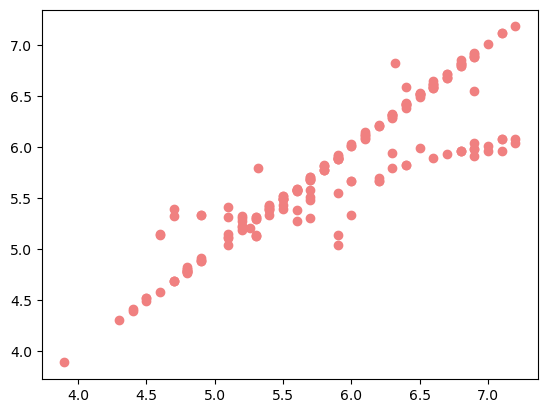

In [7]:
#podejrzenie wspóliniowości x dimension, y dimension i z dimension
plt.scatter(data['x dimension'], data['y dimension'], color = 'lightcoral')

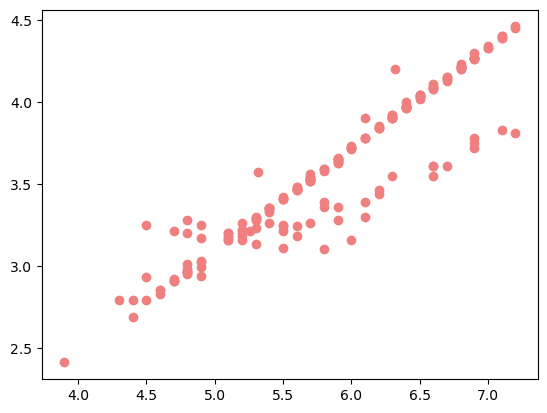

In [8]:
plt.scatter(data['x dimension'], data['z dimension'], color = 'lightcoral')

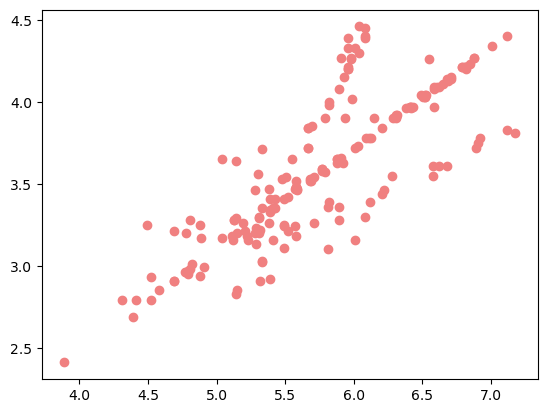

In [9]:
plt.scatter(data['y dimension'], data['z dimension'], color = 'lightcoral')

In [10]:
#wyrzucam x dimension i y dimension ze względu na wspóliniowość
model2 = smf.ols(formula="price ~ carat + clarity + color + cut + Q('z dimension') + depth + table", data = data).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     261.1
Date:                Fri, 02 Feb 2024   Prob (F-statistic):          1.94e-116
Time:                        19:29:47   Log-Likelihood:                -1477.6
No. Observations:                 191   AIC:                             2997.
Df Residuals:                     170   BIC:                             3065.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -1.911e+04   8777.83

In [11]:
sm.stats.anova_lm(model2, typ=2)

,sum_sq,df,F,PR(>F)
clarity,3.365008e+07,5.0,19.525387,2.422714e-15
color,1.829307e+06,7.0,0.758180,6.231096e-01
cut,6.396018e+06,4.0,4.639095,1.403349e-03
carat,1.738048e+08,1.0,504.249281,9.699154e-53
Q('z dimension'),7.988977e+06,1.0,23.177937,3.246399e-06
depth,5.646393e+05,1.0,1.638154,2.023228e-01
table,1.921555e+05,1.0,0.557489,4.563050e-01
Residual,5.859564e+07,170.0,NaN,NaN


In [12]:
#wyrzucam najmniej znaczącą zmienną: color
model3 = smf.ols(formula="price ~ carat + clarity + cut + Q('z dimension') + depth + table", data = data).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     261.1
Date:                Fri, 02 Feb 2024   Prob (F-statistic):          1.94e-116
Time:                        19:29:47   Log-Likelihood:                -1477.6
No. Observations:                 191   AIC:                             2997.
Df Residuals:                     170   BIC:                             3065.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -1.911e+04   8777.83

In [13]:
sm.stats.anova_lm(model3, typ=2)

,sum_sq,df,F,PR(>F)
clarity,4.126456e+07,5.0,24.174871,1.669859e-18
cut,5.489179e+06,4.0,4.019800,3.808668e-03
carat,1.789172e+08,1.0,524.093736,8.593268e-55
Q('z dimension'),9.732369e+06,1.0,28.508579,2.834654e-07
depth,4.605778e+05,1.0,1.349149,2.469908e-01
table,3.003467e+05,1.0,0.879792,3.495369e-01
Residual,6.042495e+07,177.0,NaN,NaN


In [14]:
#wyrzucam kolejną najmniej znaczącą zmienną: table
model4 = smf.ols(formula="price ~ carat + clarity + cut + Q('z dimension') + depth", data = data).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     439.2
Date:                Fri, 02 Feb 2024   Prob (F-statistic):          2.67e-125
Time:                        19:29:47   Log-Likelihood:                -1481.0
No. Observations:                 191   AIC:                             2988.
Df Residuals:                     178   BIC:                             3030.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -1.652e+04   8379.74

In [15]:
sm.stats.anova_lm(model4, typ=2)

,sum_sq,df,F,PR(>F)
clarity,4.418705e+07,5.0,25.904512,1.325776e-19
cut,5.743291e+06,4.0,4.208732,2.792936e-03
carat,1.858176e+08,1.0,544.674688,4.766560e-56
Q('z dimension'),9.610467e+06,1.0,28.170521,3.276764e-07
depth,4.885877e+05,1.0,1.432165,2.330030e-01
Residual,6.072529e+07,178.0,NaN,NaN


In [16]:
#wyrzucam kolejną najmniej znaczącą zmienną: depth
model5 = smf.ols(formula="price ~ carat + clarity + cut + Q('z dimension')", data = data).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     477.9
Date:                Fri, 02 Feb 2024   Prob (F-statistic):          2.43e-126
Time:                        19:29:47   Log-Likelihood:                -1481.7
No. Observations:                 191   AIC:                             2987.
Df Residuals:                     179   BIC:                             3026.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6514.2783    603.33

In [17]:
sm.stats.anova_lm(model5, typ=2)

,sum_sq,df,F,PR(>F)
clarity,4.372291e+07,5.0,25.570671,2.008501e-19
cut,5.986780e+06,4.0,4.376595,2.118809e-03
carat,1.988248e+08,1.0,581.398137,4.070313e-58
Q('z dimension'),9.287487e+06,1.0,27.158222,5.126830e-07
Residual,6.121388e+07,179.0,NaN,NaN


In [18]:
#wszystkie zmienne są juz istotne, dlatego zostawiam je i dokładam interakcje
model6 = smf.ols(formula="price ~ carat + clarity + cut + Q('z dimension') + Q('z dimension')*carat", data = data).fit()
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     466.8
Date:                Fri, 02 Feb 2024   Prob (F-statistic):          1.41e-127
Time:                        19:29:47   Log-Likelihood:                -1475.3
No. Observations:                 191   AIC:                             2977.
Df Residuals:                     178   BIC:                             3019.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -3588

In [19]:
sm.stats.anova_lm(model6, typ=2)

,sum_sq,df,F,PR(>F)
clarity,4.425708e+07,5.0,27.522368,1.383087e-20
cut,6.111120e+06,4.0,4.750440,1.151090e-03
carat,1.988248e+08,1.0,618.220685,8.428994e-60
Q('z dimension'),9.287487e+06,1.0,28.878274,2.391459e-07
Q('z dimension'):carat,3.967638e+06,1.0,12.336872,5.628914e-04
Residual,5.724624e+07,178.0,NaN,NaN
